# Treinamento de IA Stefanini
##Nome: João Vitor Rodrigues Baptista
## [Github](https://github.com/helpthx) 
##[LinkedIn](https://www.linkedin.com/in/jo%C3%A3o-vitor-rodrigues-baptista-4a3546149/) 

### Base de dados fashion_mnist com MPL de duas camadas 

In [0]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
  
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, accuracy_score
%matplotlib inline

(50000, 28, 28) (50000,)


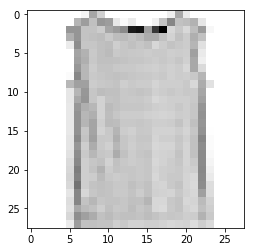

In [94]:
def fashing_mnist_dataset():
    (X_train, y_train), (X_test, y_test) =\
    keras.datasets.fashion_mnist.load_data()

    # Normalziando os dados
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # Fazendo pelo menos 10000 do dataset para ser de avaliação
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = \
fashing_mnist_dataset()

print(X_train.shape, y_train.shape)
plt.imshow(X_train[700], cmap="Greys");


Exemplos de imagens: 


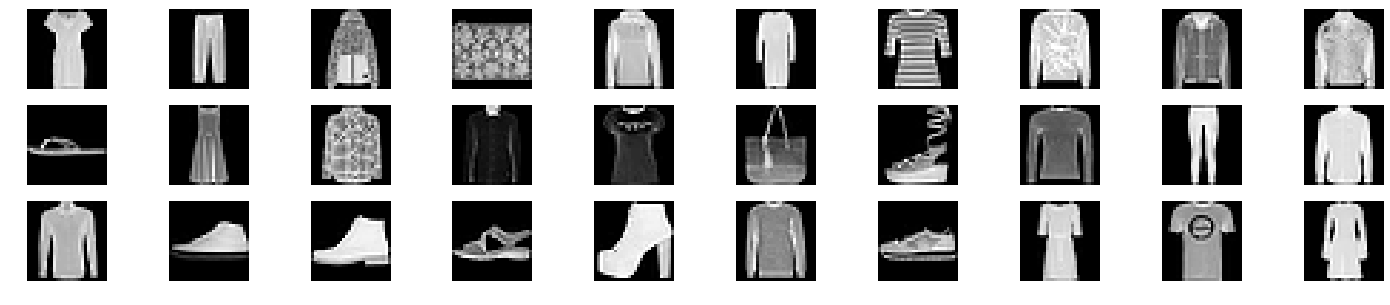

In [96]:
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train[20:50], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

In [97]:
X_train = X_train.reshape(
    (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))

X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Dimensão do array de treinamento:', X_train.shape)
print('Dimensão do array de teste:', X_test.shape)

Dimensão do array de treinamento: (50000, 784)
Dimensão do array de teste: (10000, 784)


In [98]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print('Dimensão do array de treinamento dos rotulos:', train_labels.shape)
print('Dimensão do array de teste rotulos:', y_test.shape)

Dimensão do array de treinamento dos rotulos: (50000, 10)
Dimensão do array de teste rotulos: (10000, 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0, Train loss: 37.62 Train acc: 0.778, Test acc:0.762
Epoch:1, Train loss: 20.69 Train acc: 0.817, Test acc:0.805
Epoch:2, Train loss: 11.71 Train acc: 0.845, Test acc:0.830
Epoch:3, Train loss: 6.88 Train acc: 0.850, Test acc:0.837
Epoch:4, Train loss: 4.31 Train acc: 0.847, Test acc:0.830
Epoch:5, Train loss: 2.94 Train acc: 0.860, Test acc:0.847
Epoch:6, Train loss: 2.22 Train acc: 0.862, Test acc:0.849
Epoch:7, Train loss: 1.86 Train acc: 0.861, Test acc:0.845
Epoch:8, Train loss: 1.68 Train acc: 0.870, Test acc:0.856
Epoch:9, Train loss: 1.60 Train acc: 0.871, Test acc:0.853
Epoch:10, Train loss: 1.56 Train acc: 0.868, Test acc:0.852
Epoch:11, Train loss: 1.55 Train acc: 0.868, Test acc:0.850
Epoch:12, Train loss: 1.54 Train acc: 0.867, Test acc:0.851
Epoch:13, Train loss: 1.54 Train acc: 0.862, Test acc:0.844
Epoch:14, Train loss: 1.53 Train acc: 0.878, Test acc:0.859
Epoch:15, Train loss: 1.54 Train acc: 0.863, Test acc:0.846
Epoch:16, Train loss: 1.54 Train acc: 0.874, Te

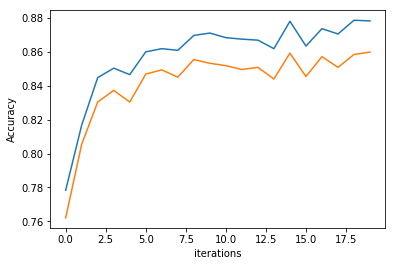

Train Accuracy: 0.88
Test Accuracy:0.86


In [109]:
from sklearn.metrics import confusion_matrix
def MLP_Model(num_classes, num_features, num_output, 
              epochs, dropout_prob, num_layers_0=512, 
              num_layers_1=256, starter_learning_rate = 0.001, regularizer_rate = 0.1):

  s = tf.InteractiveSession()

  input_X = tf.placeholder('float32',shape =(None,num_features),name="input_x")
  input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_y')

  keep_prob = tf.placeholder(tf.float32)

  # Fazendo os pesos e os vieses de descritos em variables do tf
  weights_0 = tf.Variable(tf.random_normal([num_features,
                                              num_layers_0], 
                                             stddev=(1/tf.sqrt(float(num_features)))))

  bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

  weights_1 = tf.Variable(tf.random_normal([num_layers_0,
                                              num_layers_1], 
                                             stddev=(1/tf.sqrt(float(num_layers_0)))))

  bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

  weights_2 = tf.Variable(tf.random_normal([num_layers_1,
                                              num_output], 
                                             stddev=(1/tf.sqrt(float(num_layers_1)))))

  bias_2 = tf.Variable(tf.random_normal([num_output]))

  # Fazendo e conectando os neuronios e fazendo a multiplicação da entrada pelo peso
  # Somando com o bias de cada neuronio (input*peso + vies)
  hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
  hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)

  hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
  hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)

  predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

  # Usando sofmax_cross_entropy para fazer e fazendo o backpropagation (n*vies + vies1)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
          + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

  # Iniciando o n -> leraning rate 
  learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)

  # Fazendo o backpropagation usando AdamOptimizer 
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,
                                                               var_list=[weights_0,
                                                                         weights_1,
                                                                         weights_2,
                                                                         bias_0,
                                                                         bias_1,
                                                                         bias_2])

  # Metricas para avaliação do medelo
  correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  training_accuracy = []
  training_loss = []
  testing_accuracy = []

  s.run(tf.global_variables_initializer())
  for epoch in range(epochs):    
      arr = np.arange(X_train.shape[0])
      np.random.shuffle(arr)
      for index in range(0,X_train.shape[0],batch_size):
          s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                            input_y: y_train[arr[index:index+batch_size]],
                          keep_prob:dropout_prob})
          
      training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                           input_y: y_train,keep_prob:1}))
      training_loss.append(s.run(loss, {input_X: X_train, 
                                        input_y: y_train,keep_prob:1}))

      ## Evaluation of model
      testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                              s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
      
      print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                      training_loss[epoch],
                                                                      training_accuracy[epoch],
                                                                     testing_accuracy[epoch]))
  iterations = list(range(epochs))
  plt.plot(iterations, training_accuracy, label='Train')
  plt.plot(iterations, testing_accuracy, label='Test')
  plt.ylabel('Accuracy')
  plt.xlabel('iterations')
  plt.show()
  print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
  print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1])) 
      
MLP_Model(num_classes=y_train.shape[1], num_features = X_train.shape[1], 
          num_output = y_train.shape[1], epochs=20, dropout_prob = 0.6)

### Referencias:
[MPL in TF](https://github.com/aayushmnit/Deep_learning_explorations/blob/master/2_MLP_tensorflow/my1stNN.ipynb)